# Исследование объявлений о продаже квартир

В моем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цели исследования**
1. Изучить различные параметры продаваемых объектов, описать выявленные наблюдения.
2. Определить как быстро продавались квартиры, обозначить какие продажи можно считать быстрыми, а какие, наоборот, слишком долгими.
3. Оценить какие факторы больше всего влияют на общую стоимость объекта недвижимости.
4. Посчитать среднюю цену одного квадратного метра в населенных пунктах с наибольшим количеством объявлений, выявить населенные пункты с самой высокой и низкой стоимостью недвижимости.
5. Определить как стоимость объектов недвижимости в СПб зависит от расстояния до центра.

**Ход исследования**

Данные получены из файла `real_estate_data.csv`. О качестве данных ничего не известно. Поэтому перед исследовательским анализом понадобится обзор данных и их предобработка. 

**Этапы исследования**
 1. Импорт библиотек и обзор данных:
 * изучить общую инофрмацию об имеющихся данных;
 * построить общую гистограмму для всех числовых столбцов таблицы
 2. Предобработка данных:
 * определить столбцы с пропусками и заполнить их там где возможно;
 * изучить типы данных в столбцах и изменить в случае необходимости;
 * найти и устранить неявные дубликаты в столбце с названимями населенных пунктов;
 * найти и устранить редкие и выбивающиеся значения.
 3. Подготовка данных для исследования - добавить новые столбцы:
 * цена одного квадратного метра;
 * день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
 * месяц публикации объявления;
 * год публикации объявления;
 * тип этажа квартиры (значения — «‎первый», «последний», «другой»);
 * расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
 4. Проверка гипотез:
 * изучить следующие параметры объектов: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления;
 * изучить как быстро продавались квартиры;
 * определить факторы, которые больше всего влияют на стоимость объекта;
 * посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений, выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра;
 * определить как стоимость объекта в Санкт-Петербурге зависит от расстояния до центра. 
 5. Результаты исследования.
 
**Оглавление**
<a id='section_id6'></a>
 1. [Импорт библиотек и обзор данных](#section_id1)
 2. [Предобработка данных](#section_id2)
 3. [Подготовка данных для исследования - добавление новых столбцов](#section_id3)
 4. [Проверка гипотез](#section_id4)
 5. [Результаты исследования](#section_id5)

## 1. Импорт библиотек и обзор данных
<a id='section_id1'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# загружаем данные
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # загрузим таблицу
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
df.info() # получим основную информацию о таблице 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.shape # узнаем размер таблицы

(23699, 22)

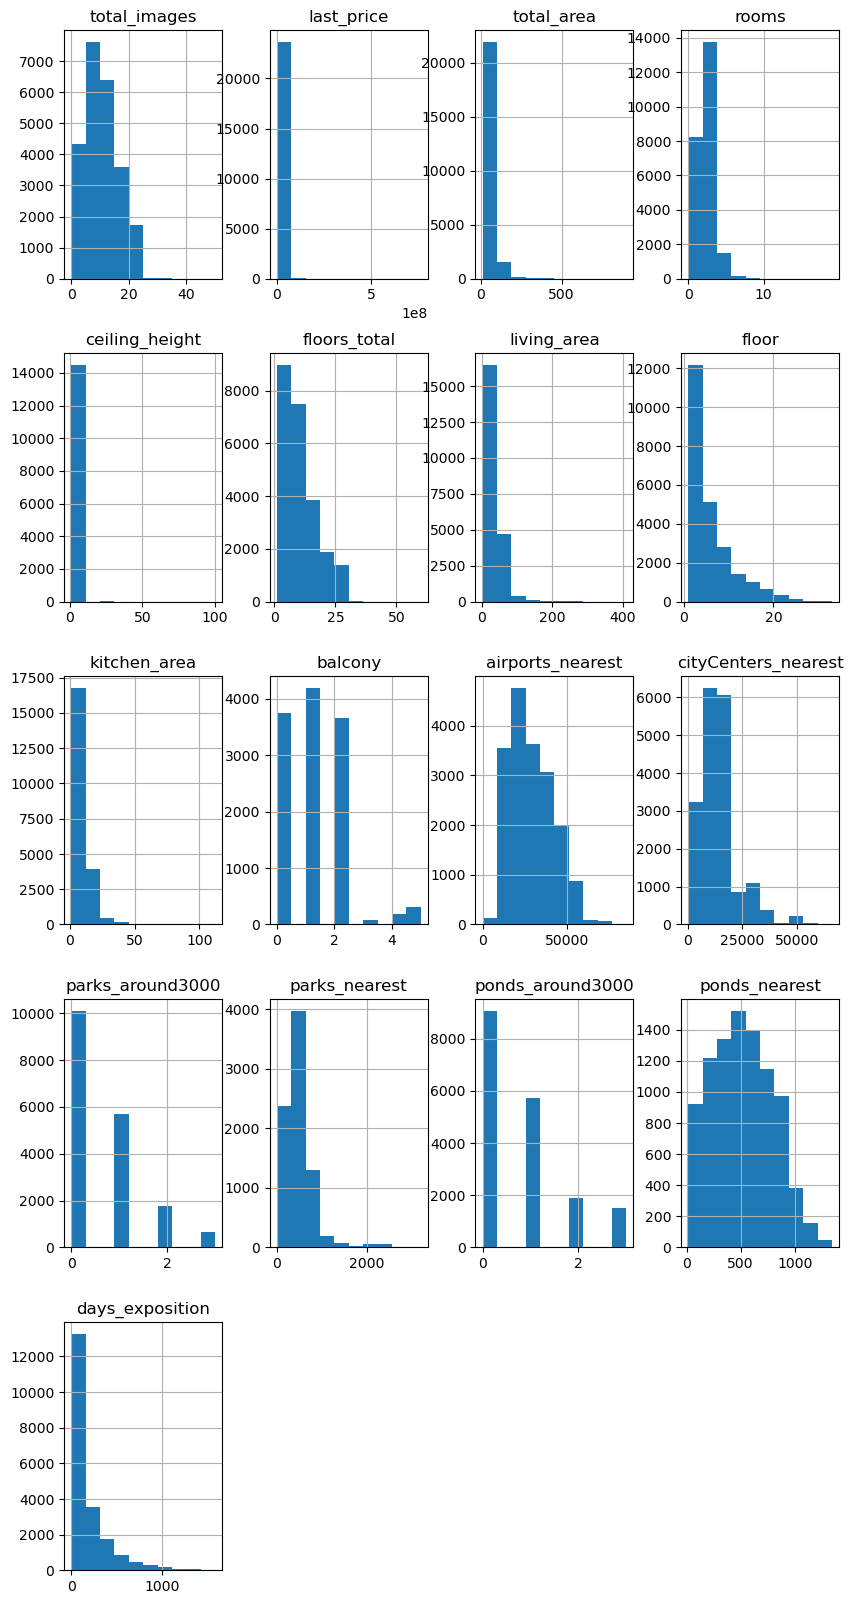

In [5]:
df.hist(figsize=(10,20)); # построим гистограммы для всех столбцов таблицы

**Выводы:**
1. В полученной таблице 22 колонки и 23699 строк. В части колонок есть пропуски - изучим их природу. 
2. Построены гистограммы для всех числовых столбцов - изучим их детально на следующих этапах.

[Оглавление](#section_id6)

## 2. Предобработка данных
<a id='section_id2'></a>

### Поиск пропущенных значений

Пропущенные значения обнаружены в следующих колонках:<ol>
<li>ceiling_height - могут быть различные значения, не будем заполнять</li>
<li>floors_total - могут быть различные значения, не будем заполнять</li>
<li>living_area - могут быть различные значения, не будем заполнять</li>
<li>is_apartment- могут быть различные значения, не будем заполнять</li>
<li>kitchen_area - могут быть различные значения, не будем заполнять</li>
<li>balcony - заполним значением 0</li>
<li>locality_name - могут быть различные значения, не будем заполнять</li>
<li>airports_nearest - могут быть различные значения, не будем заполнять</li>
<li>cityCenters_nearest - могут быть различные значения, не будем заполнять</li>
<li>parks_around3000 - заполним значением 0</li>
<li>parks_nearest - могут быть разные значения, не будем заполнять</li>
<li>ponds_around3000 - заполним значением 0</li>
<li>ponds_nearest - могут быть разные значения, не будем заполнять</li>
<li>days_exposition - не будем заполнять никак, т.к. можен объявление еще висит на момент формирования выгрузки</li>


In [6]:
# определим долю пропущенных значений по каждой колонке
pd.DataFrame(round(df.isna().mean()*100,3)).style.background_gradient(low=1, high=0, vmax=5)

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.799000
floors_total,0.363000
living_area,8.030000
floor,0.000000
is_apartment,88.291000


In [7]:
# заменим пропуски на соответствующие значения
df['balcony'] = df['balcony'].fillna(value=0)
df['parks_around3000'] = df['parks_around3000'].fillna(value=0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0)
ceiling_height_avg = df['ceiling_height'].median() # считаем медиану высоты потолков
df['ceiling_height'] = df['ceiling_height'].fillna(value=ceiling_height_avg)
# удалим строки с пропусками в колонках floors_total и locality_name, обновим индексы в датафрейме
df = df.dropna(subset=['floors_total', 'locality_name']).reset_index(drop=True) 

In [8]:
# убедимся, что изменения вступили в силу
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

**Пропуски в данных могли возникнуть по следующим причинам:**<ol>
<li> не все поля являются обязательными для заполнения, соответственно пользователи размещая объявление заполняли только то, что считали нужным;</li>
<li> данные потерялись в процессе выгрузки - особенно это относится к картографическим данным, которые должны были выставляться системой автоматически.</li></ol>

### Изменение типов данных в столбцах

**Изменить тип данных нужно в следующих столбцах:**
<ol>
    <li> first_day_exposition - изменим на datetime, т.к. в этом формате будет удобно фильтровать объявления по нужным нам временным интервалам или делать сводную таблицу, например, по месяцам, кварталам;</li>
    <li> is_apartment - изменим на bool, т.к. это булевый тип данных и в нем возможны только два варианта ответа (да или нет).</li>
</ol>

In [9]:
# изменим тип данных в колонках first_day_exposition на datetime и is_apartment на bool
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%d')
df['is_apartment'] = df['is_apartment'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

### Поиск неявных дубликатов

In [10]:
print(df['locality_name'].unique()) # посмотрим все уникальные значения в столбце, чтобы оценить как убирать неявные дубли
df['locality_name'] = df['locality_name'].str.lower() # приводим все значения к нижнему регистру
df['locality_name'] = df['locality_name'].str.replace('ё', 'е') # меняем все ё на е
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа', 'поселок') # меняем все пгт на поселки

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

### Поиск редких и выбивающихся значений

Построим диаграммы размаха для всех числовых столбцов, посмотрим в каких столбцах есть аномальные значения.

count    23565.000000
mean         9.878421
std          5.681156
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64


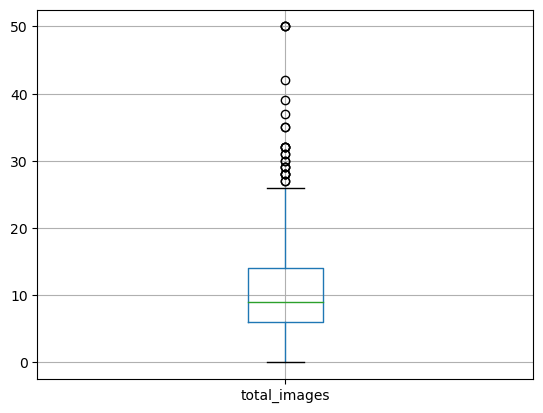


count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64


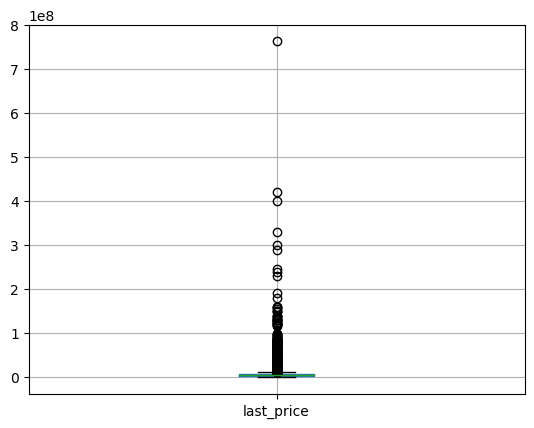


count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


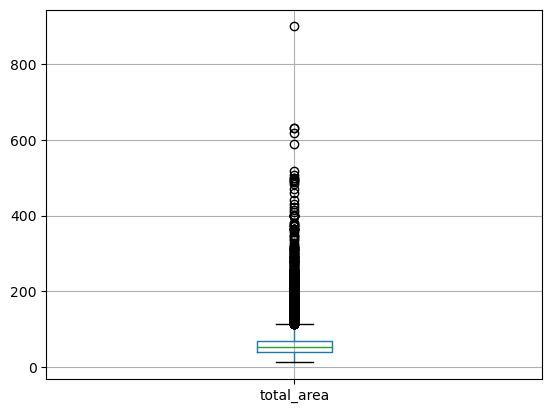


count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


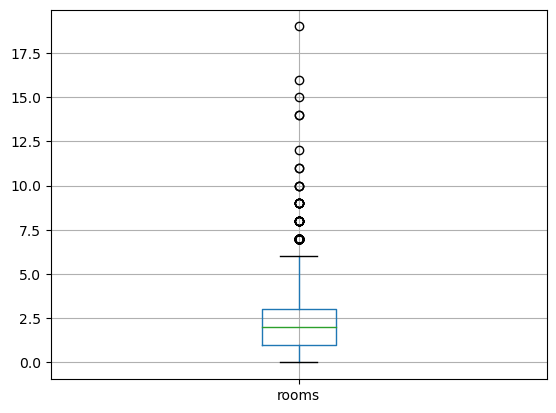


count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


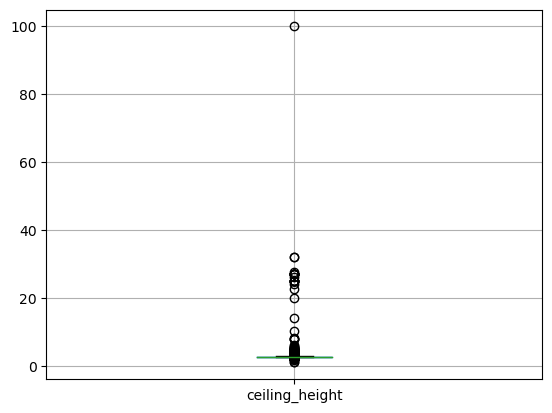


count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


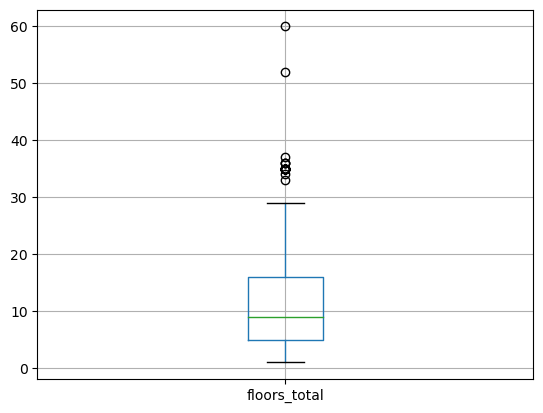


count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


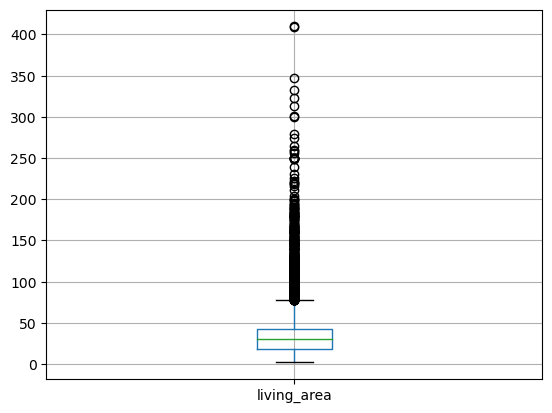


count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


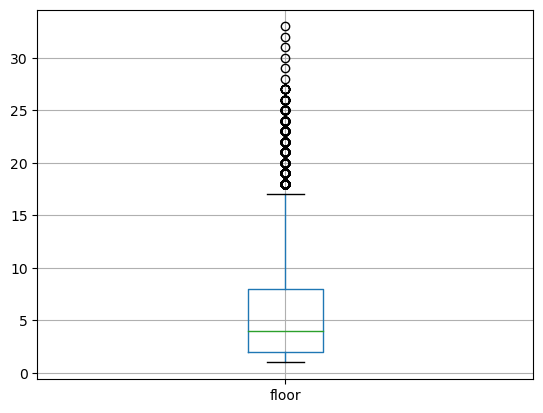


count    21343.000000
mean        10.560994
std          5.900630
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


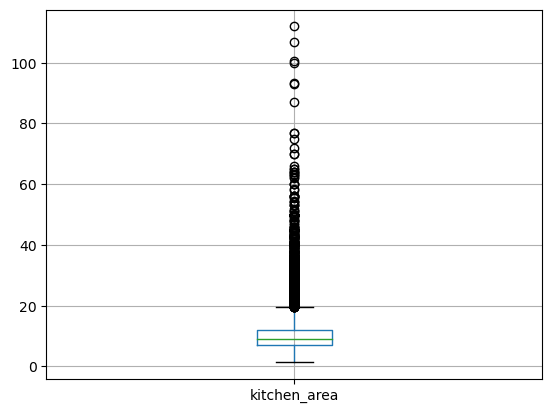


count    23565.000000
mean         0.593677
std          0.960660
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64


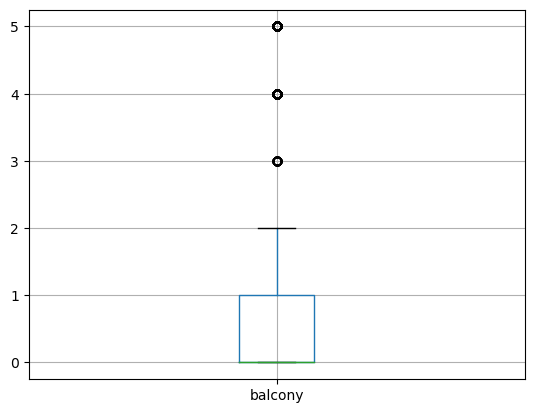


count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64


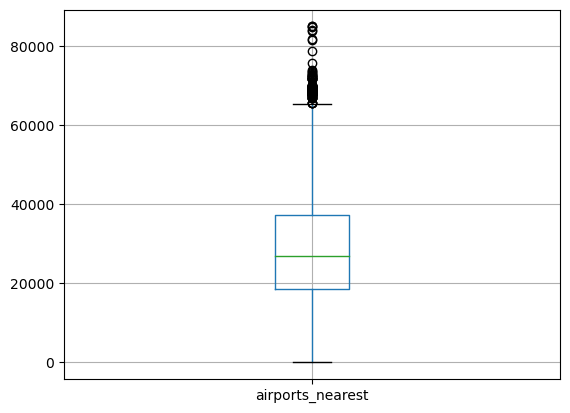


count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


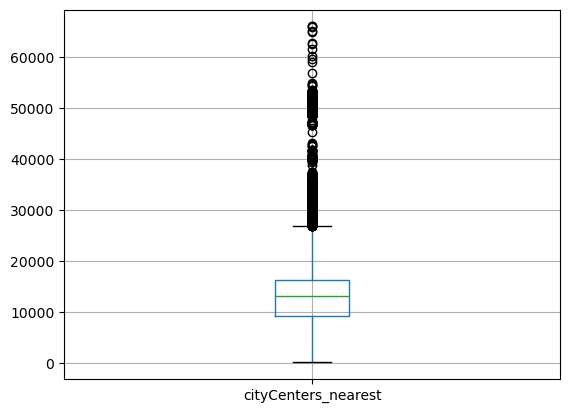


count    23565.000000
mean         0.468831
std          0.748403
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64


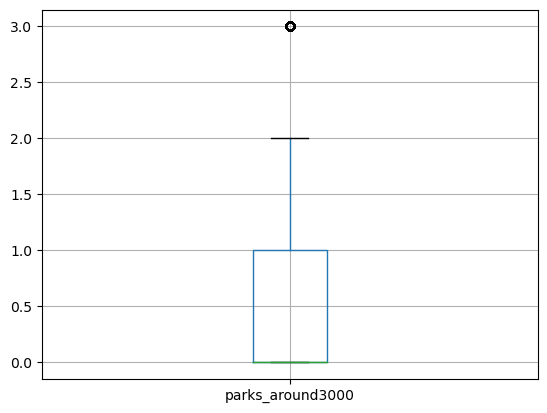


count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


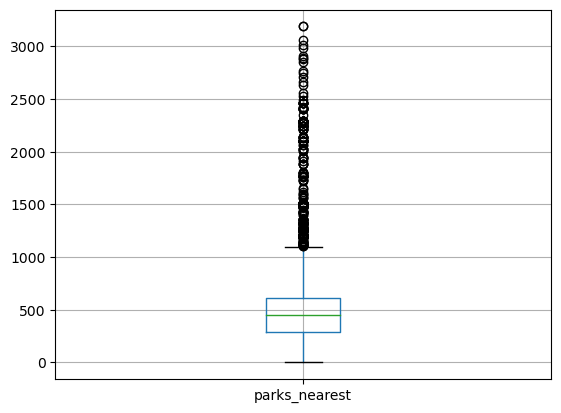


count    23565.000000
mean         0.589900
std          0.883966
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64


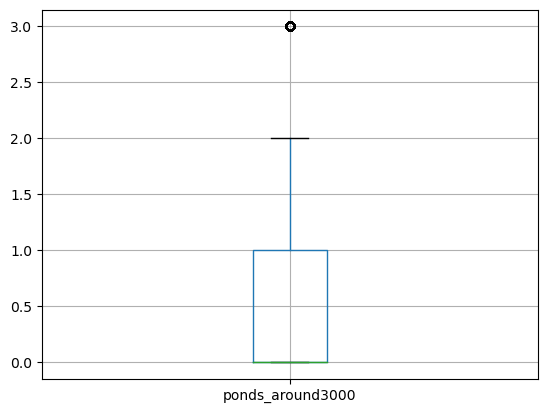


count    9036.000000
mean      518.289509
std       278.009558
min        13.000000
25%       293.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64


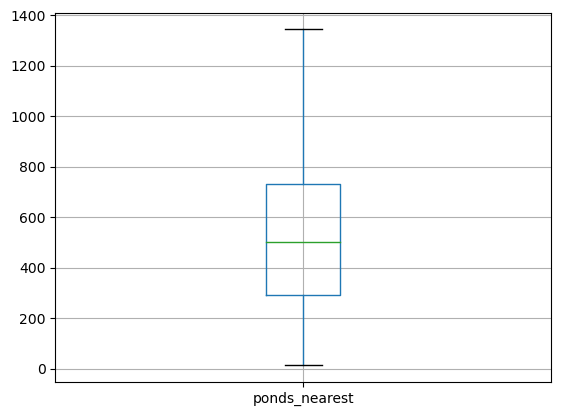


count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


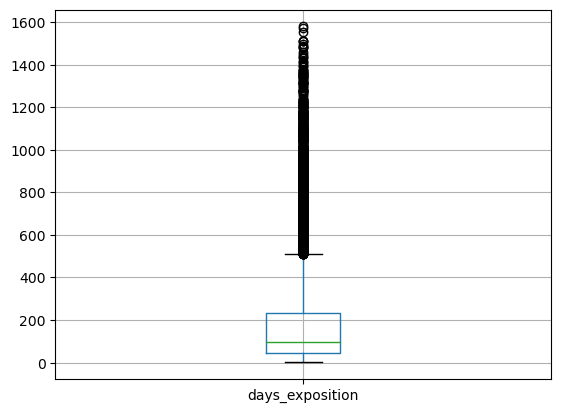

In [11]:
columns = list(df)
for i in columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64': # применяем метод describe только к столбцам с числами
        print(df[i].describe())
        df.boxplot(column=i)
        plt.show()
        print()

**Будем исследовать аномалии в следующих столбцах:** ceiling_height, floors, living_area, floor, kitchen_area. Еще не нравится формат выведения цены объекта, переведем данные в колонке last_price в тысячи рублей.

In [12]:
df['last_price_th'] = df['last_price']/1000 # добавляем новую колонку стоимость объекта в тысячах рублей

**Ceiling_height:** в соответствии с диаграммой размаха есть ряд значений больше 20м. Эти значения могут быть корректными, если изменить их порядок - разделить на 10. Возьмем все значения больше 21 метра и меньше 60 метров и разделим их на 10.

In [13]:
df.loc[(df['ceiling_height'] >= 21) & (df['ceiling_height'] <= 60), 'ceiling_height'] = \
    df.loc[(df['ceiling_height'] >= 21) & (df['ceiling_height'] <= 60), 'ceiling_height'] / 10 

count    23565.000000
mean         2.703330
std          0.690295
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


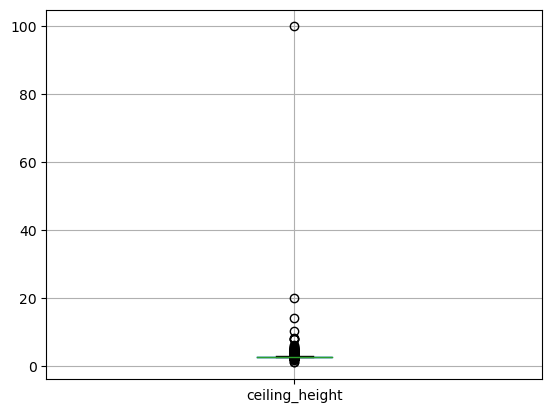

In [14]:
# построим боксплот, чтобы убедиться, что изменения вступили в силу
df.boxplot('ceiling_height')
print(df['ceiling_height'].describe())

Удалим в колонке с высотой потолка те значения, которые выходят за пределы межквартильного интервала по нижней границе. 

In [15]:
df = df[~((df['ceiling_height'] <= (df['ceiling_height'].quantile(0.25) - (df['ceiling_height'].quantile(0.75) - df['ceiling_height'].quantile(0.25))*1.5))
          | (df['ceiling_height'] >= (df['ceiling_height'].quantile(0.75) + (df['ceiling_height'].quantile(0.75) - df['ceiling_height'].quantile(0.25))*1.5)))]
print(df['ceiling_height'].describe())

count    20618.000000
mean         2.631075
std          0.081491
min          2.460000
25%          2.600000
50%          2.650000
75%          2.650000
max          2.850000
Name: ceiling_height, dtype: float64


count    20618.000000
mean         2.631075
std          0.081491
min          2.460000
25%          2.600000
50%          2.650000
75%          2.650000
max          2.850000
Name: ceiling_height, dtype: float64


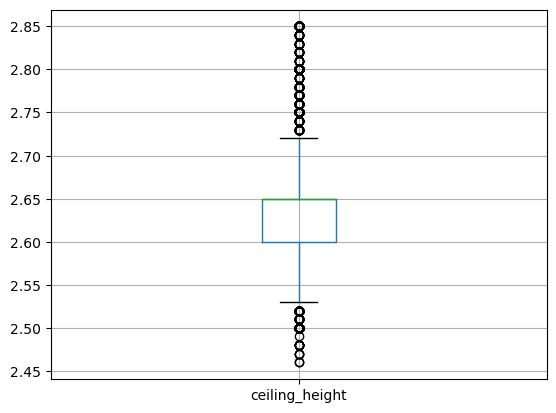

In [16]:
df.boxplot('ceiling_height')
print(df['ceiling_height'].describe())

In [17]:
# Теперь диаграмма размаха выглядит нормально.
# Несмотря на то, что часть значений выбивается за пределы усов, оставим их для проведения исследования.
for col in df.select_dtypes(['int', 'float']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df[col] = df[col].where(((df[col] > (Q1 - 1.5*IQR)) & (df[col] < (Q3 + 1.5*IQR))), np.nan)

count    20591.000000
mean         9.749454
std          5.566370
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         25.000000
Name: total_images, dtype: float64


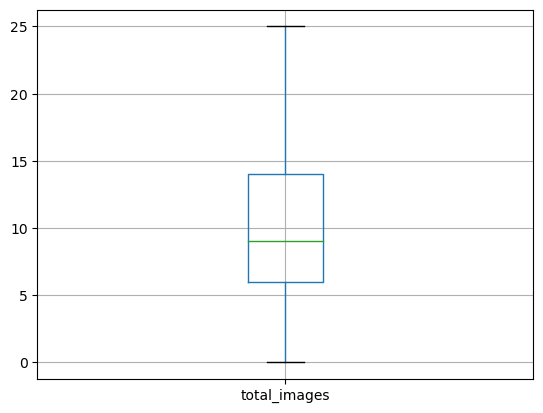


count    1.911100e+04
mean     4.489814e+06
std      1.872481e+06
min      1.219000e+04
25%      3.200000e+06
50%      4.200000e+06
75%      5.500000e+06
max      1.004850e+07
Name: last_price, dtype: float64


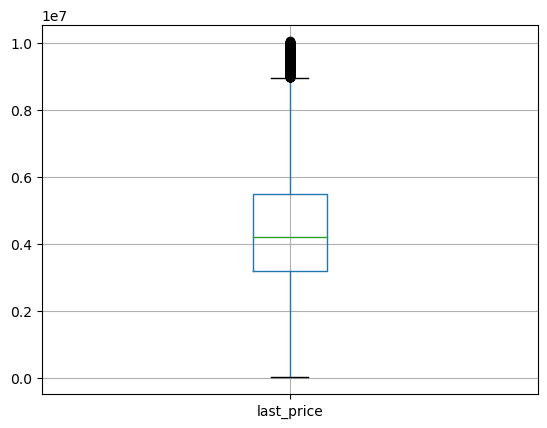


count    19719.000000
mean        51.672762
std         16.998131
min         12.000000
25%         38.300000
50%         47.900000
75%         62.000000
max        102.100000
Name: total_area, dtype: float64


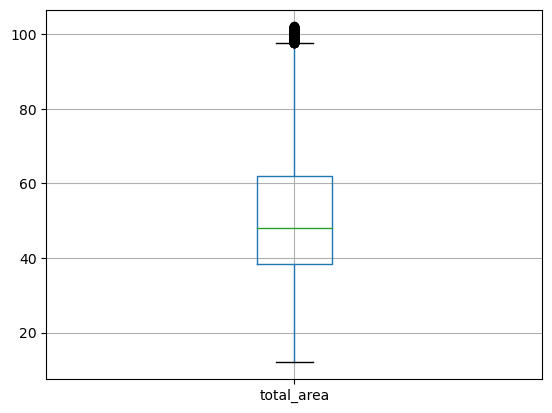


count    20547.000000
mean         1.947097
std          0.927675
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64


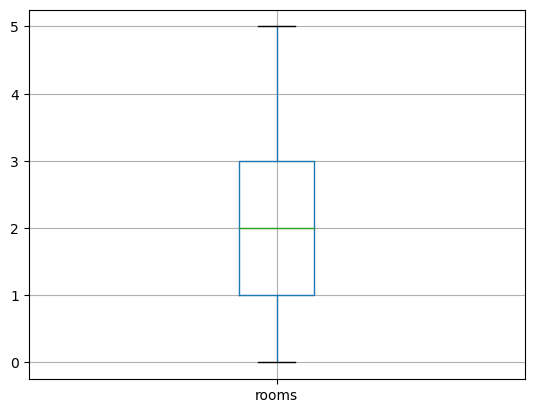


count    14667.000000
mean         2.640346
std          0.037733
min          2.530000
25%          2.650000
50%          2.650000
75%          2.650000
max          2.720000
Name: ceiling_height, dtype: float64


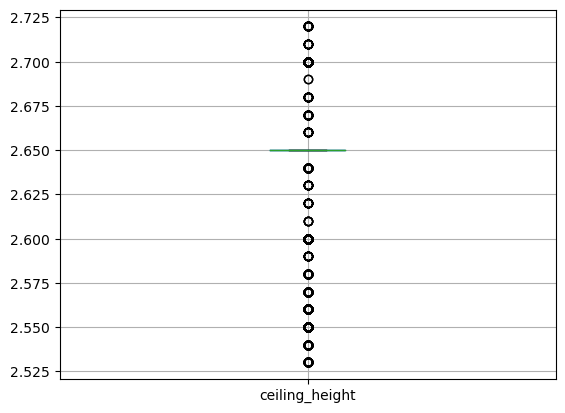


count    20588.000000
mean        11.173548
std          6.598834
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64


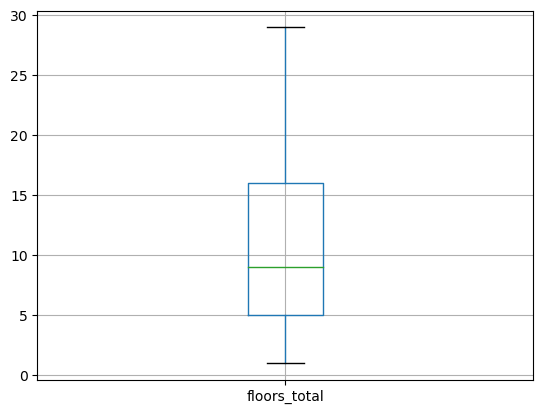


count    18531.000000
mean        29.957989
std         12.646253
min          2.000000
25%         18.000000
50%         29.000000
75%         39.000000
max         72.700000
Name: living_area, dtype: float64


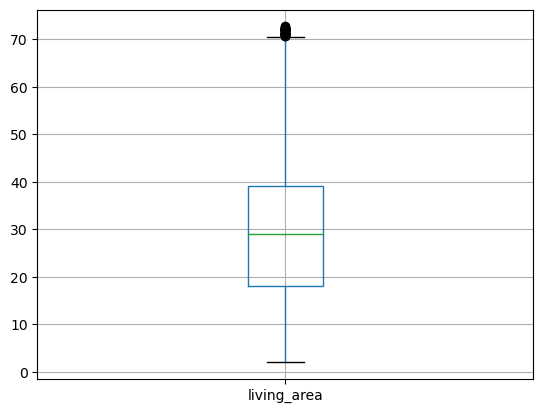


count    19537.000000
mean         5.344986
std          3.797904
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         16.000000
Name: floor, dtype: float64


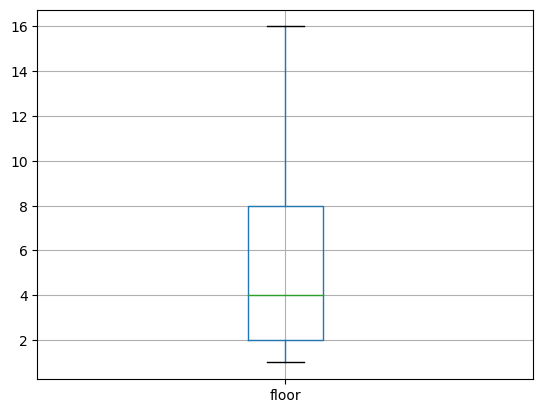


count    17651.000000
mean         9.177159
std          2.866567
min          1.300000
25%          7.000000
50%          8.900000
75%         11.000000
max         17.700000
Name: kitchen_area, dtype: float64


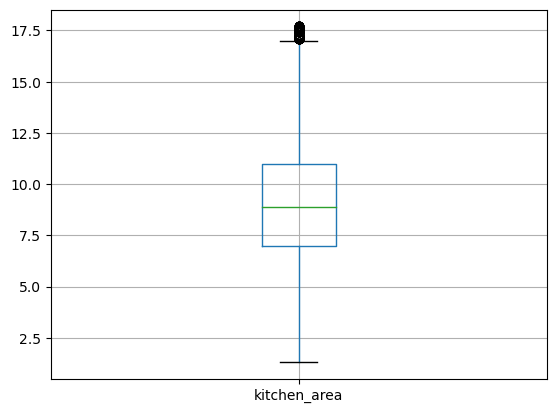


count    20152.000000
mean         0.527293
std          0.767400
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: balcony, dtype: float64


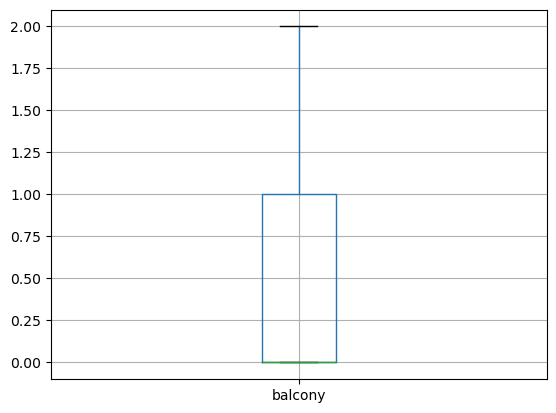


count    15306.000000
mean     29115.187116
std      12870.219265
min          0.000000
25%      17977.250000
50%      27850.000000
75%      38171.000000
max      68760.000000
Name: airports_nearest, dtype: float64


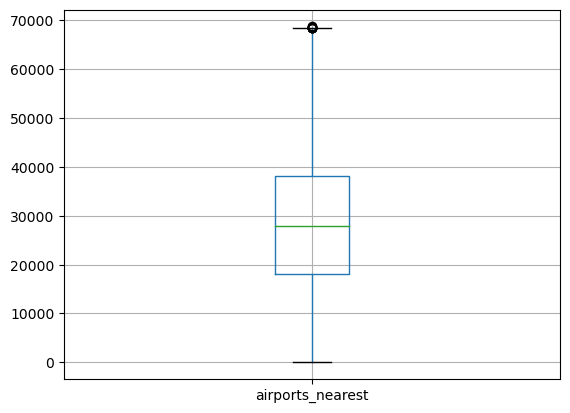


count    13437.000000
mean     12989.717869
std       4304.279972
min       2408.000000
25%      10731.000000
50%      13218.000000
75%      15658.000000
max      25308.000000
Name: cityCenters_nearest, dtype: float64


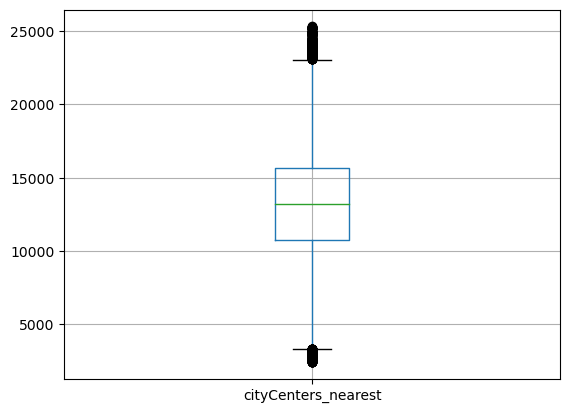


count    20267.000000
mean         0.348399
std          0.589848
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: parks_around3000, dtype: float64


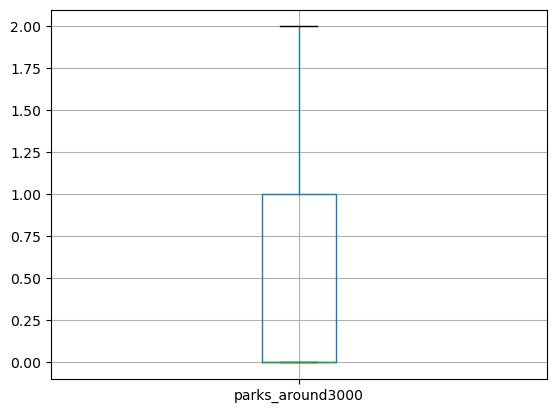


count    5927.000000
mean      451.856757
std       219.311744
min         1.000000
25%       290.000000
50%       456.000000
75%       605.000000
max      1114.000000
Name: parks_nearest, dtype: float64


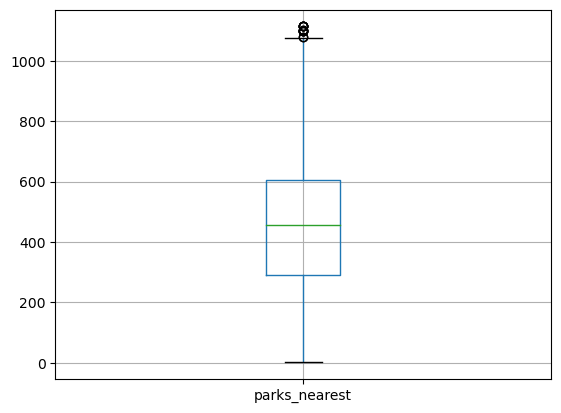


count    19670.000000
mean         0.400305
std          0.626089
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: ponds_around3000, dtype: float64


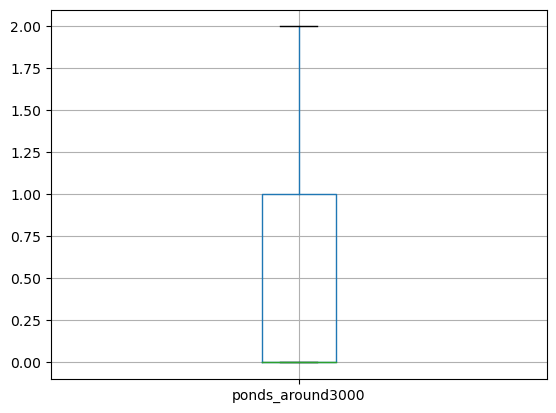


count    7328.000000
mean      532.347025
std       278.356681
min        13.000000
25%       314.000000
50%       516.000000
75%       747.250000
max      1344.000000
Name: ponds_nearest, dtype: float64


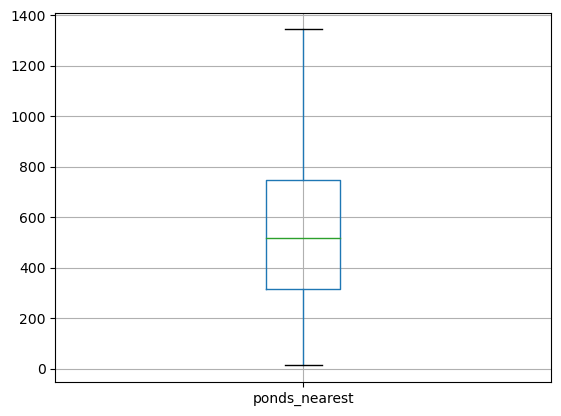


count    16553.000000
mean       120.495681
std        112.889367
min          1.000000
25%         39.000000
50%         79.000000
75%        172.000000
max        476.000000
Name: days_exposition, dtype: float64


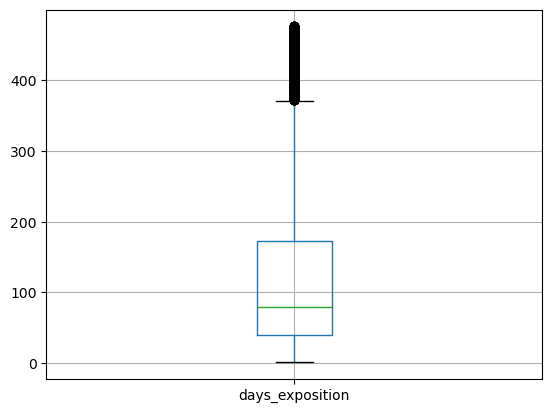


count    19111.000000
mean      4489.813788
std       1872.481286
min         12.190000
25%       3200.000000
50%       4200.000000
75%       5500.000000
max      10048.500000
Name: last_price_th, dtype: float64


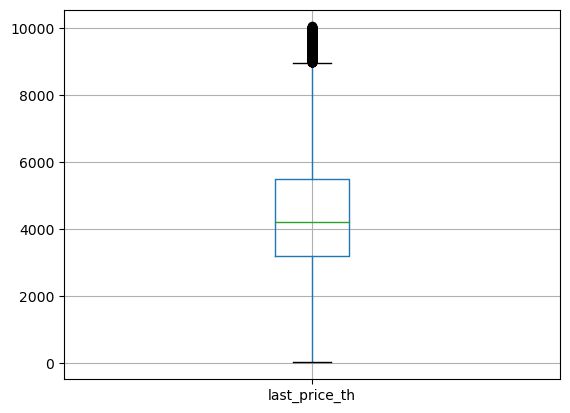

In [18]:
columns = list(df)
for i in columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64': # применяем метод describe только к столбцам с числами
        print(df[i].describe())
        df.boxplot(column=i)
        plt.show()
        print()        

In [19]:
# убедимся в отсутствии явных дубликатов
print(df.duplicated().sum())

0


In [20]:
df = df.drop_duplicates().reset_index(drop=True)

In [21]:
df = df.dropna(subset=['floors_total', 'balcony']).reset_index(drop=True)

In [22]:
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')

**Выводы:**
1. Изменили тип данных в колонках is_apartment на bool и first_day_exposition на datetime.
2. Проверили на неявные дубликаты колонку с наименованием населенных пунктов.
3. Скорректировали выбивающиеся значения в колонке с высотой потолков и добавили колонку со стоимостью квартиры в тыс. руб.
4. Убедились в отсутствии явных дубликатов.

[Оглавление](#section_id6)

### 3. Подготовка данных для исследования
<a id='section_id3'></a>

In [23]:
df['price_sq_m'] = df['last_price']/df['total_area'] # считаем цену за кв метр
df['weekday'] = pd.DatetimeIndex(df['first_day_exposition']).weekday # добавляем колонку с номером дня недели
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year # добавляем колонку с годом
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month # добавляем колонку с месяцем
df['cityCenters_nearest_km'] = round(df['cityCenters_nearest']/1000) # переводим расстояние до центра в км
# print(data.head())

In [24]:
def floor_type(row): # пишем функцию для определения типа этажа
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor > 1:
        if floors_total == floor:
            return 'последний'
        else:
            return 'другой'
    else:
        return 'другой'
# row_values = [1, 30] # проверяем роботоспособность функции
# row_columns = ['floor', 'floors_total']
# row = pd.Series(data=row_values, index=row_columns)
#print(floor_type(row))

df['floor_type'] = df.apply(floor_type, axis=1) # добавляем столбец с типом этажа в наши данные

**Выводы:**
1. Добавили новые колонки с ценой за квадратный метр, с номером дня недели, с годом, с месяцем подачи объявления, перевели расстояние до центра в км, тип этажа (первый, последний, другой).
2. Данные готовы для исследования.

[Оглавление](#section_id6)

### 4. Проверка гипотез
<a id='section_id4'></a>

### Изучение параметров объектов

#### Общая площадь

count    19275.000000
mean        51.286811
std         16.812907
min         12.000000
25%         38.000000
50%         47.000000
75%         61.600000
max        102.100000
Name: total_area, dtype: float64

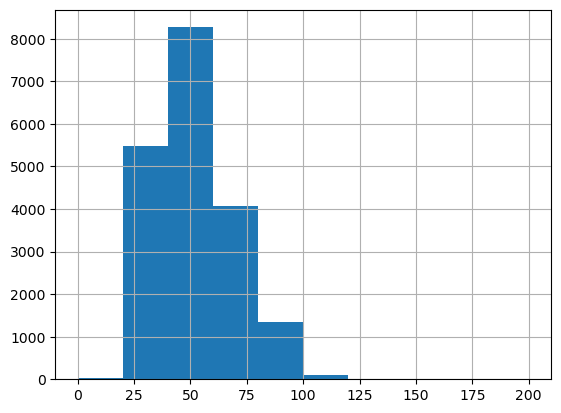

In [25]:
df['total_area'].hist(bins=10, range=[0, 200])
df['total_area'].describe()

**Вывод:** основную часть объявлений составляют квартиры площадью от 39 до 64 квадратов.

#### Жилая площадь

count    18072.000000
mean        29.680127
std         12.535835
min          2.000000
25%         18.000000
50%         28.700000
75%         38.200000
max         72.700000
Name: living_area, dtype: float64

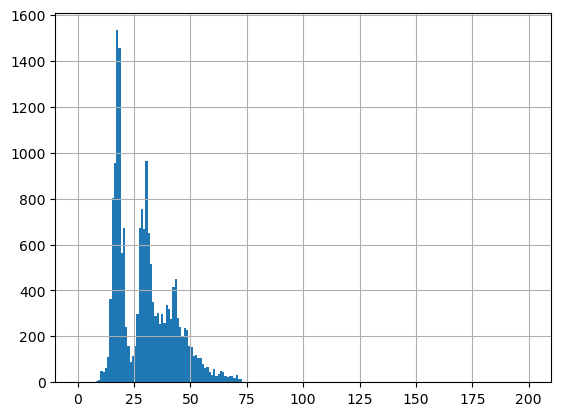

In [26]:
df['living_area'].hist(bins=200, range=[0, 200])
df['living_area'].describe()

**Вывод:** наблюдается всплеск объявлений с жилой площадью 10-20 квадратов - скорей всего сюда попали и студии, где площадь не делится на кухню и жилую.

#### Площадь кухни

count    17223.000000
mean         9.140034
std          2.851889
min          1.300000
25%          7.000000
50%          8.800000
75%         11.000000
max         17.700000
Name: kitchen_area, dtype: float64

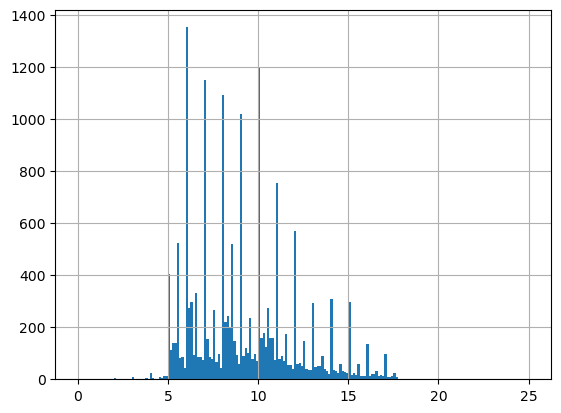

In [27]:
df['kitchen_area'].hist(bins=200, range=[0, 25])
df['kitchen_area'].describe()

**Вывод:** в основном площадь кухни находится в диапазоне от 5 до 11 квадратов.

#### Стоимость объекта

count    18723.000000
mean      4462.844020
std       1862.040054
min         12.190000
25%       3200.000000
50%       4200.000000
75%       5500.000000
max      10048.500000
Name: last_price_th, dtype: float64

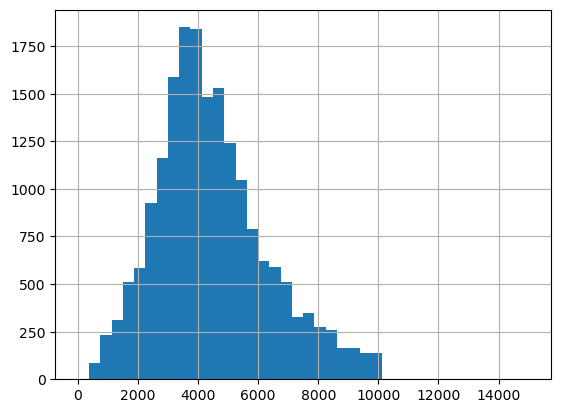

In [28]:
df['last_price_th'].hist(bins=40, range=[0,15000])
df['last_price_th'].describe()

**Вывод:** основная часть объявлений находилась в ценовом диапазоне от 3,3 млн руб. до 5,9 млн руб.

#### Число комнат

count    20052.000000
mean         1.930481
std          0.923785
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

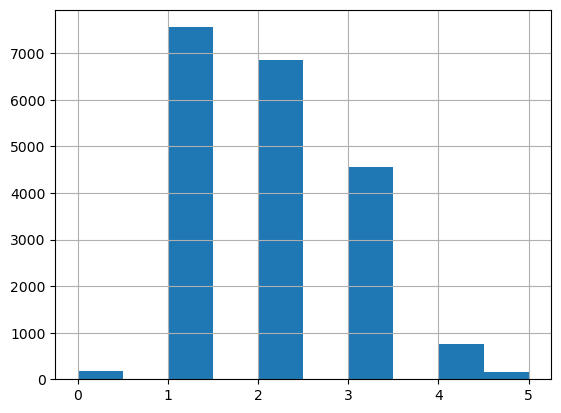

In [29]:
df['rooms'].hist(bins=10, range=[0,5])
df['rooms'].describe()

**Вывод:** больше всего на рынке представлено однокомнатных квартир. С ростом числа комнат количество объявлений снижается.

#### Высота потолков

count    14351.000000
mean         2.640368
std          0.037606
min          2.530000
25%          2.650000
50%          2.650000
75%          2.650000
max          2.720000
Name: ceiling_height, dtype: float64

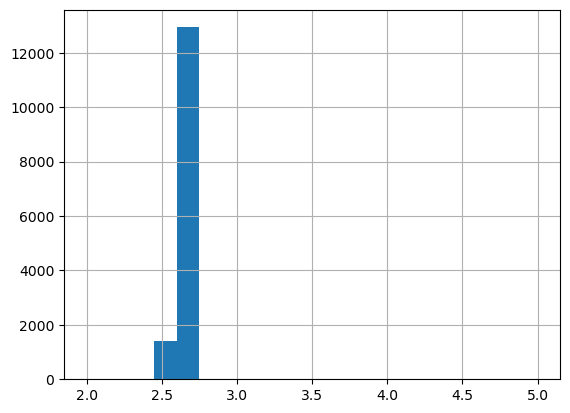

In [30]:
df['ceiling_height'].hist(bins=20, range=[2,5])
df['ceiling_height'].describe()

**Вывод:** в основном высота потолка в квартире составляет от 2.5 до 2.75м.

#### Этаж

count    19098.000000
mean         5.314588
std          3.787545
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         16.000000
Name: floor, dtype: float64

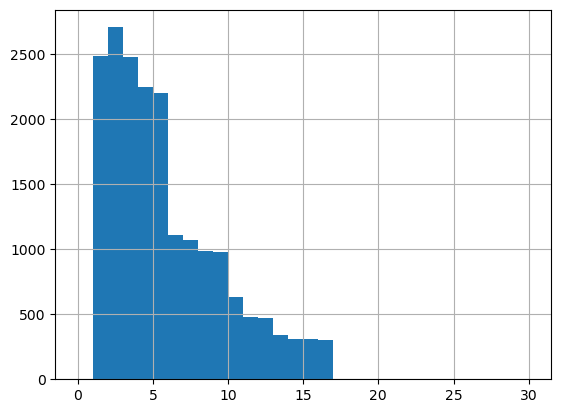

In [31]:
df['floor'].hist(bins=30, range=[0,30])
df['floor'].describe()

**Вывод:** логично, что число объявлением с увеличением этажа снижается, т.к. снижается количество домов, где высокий этаж физически возможен.

#### Тип этажа

другой       15135
последний     2500
первый        2488
Name: floor_type, dtype: int64

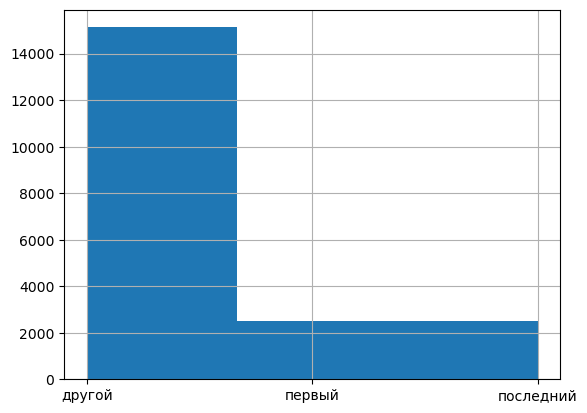

In [32]:
df['floor_type'].hist(bins=3)
df['floor_type'].value_counts()

**Вывод:** в основном кватриры расположены не на первом и не на последнем этаже.

#### Число этажей

count    20123.000000
mean        11.126969
std          6.600746
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

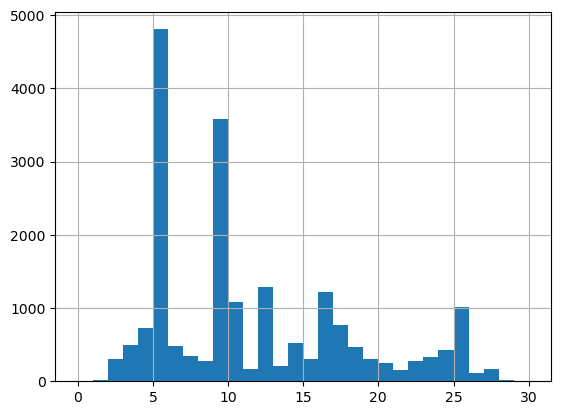

In [33]:
df['floors_total'].hist(bins=30, range=[0,30])
df['floors_total'].describe()

**Вывод:** наблюдается несколько пиков - это логично, потому что есть стандартные этажности домов (5, 9, 16, 25).

#### Расстояние до центра города

count    13099.000000
mean     12975.956180
std       4309.567574
min       2408.000000
25%      10720.000000
50%      13218.000000
75%      15658.000000
max      25308.000000
Name: cityCenters_nearest, dtype: float64

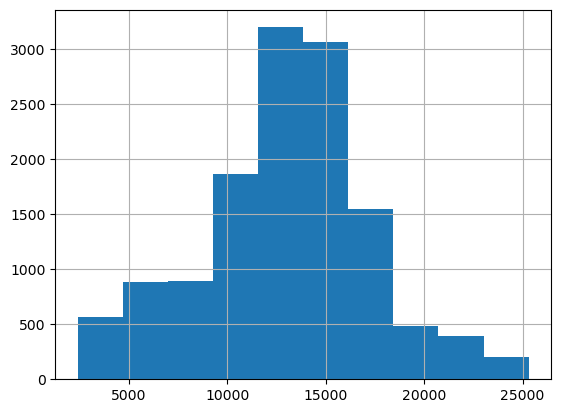

In [34]:
df['cityCenters_nearest'].hist(bins=10)
df['cityCenters_nearest'].describe()

**Вывод:** так как мы анализируем квартиры СПб и Лен. области, то логично, что основная часть квартир будет находиться не в центре, но на ограниченном отдалении от центра. С отдалением от СПб количество объявлений снижается, т.к. просто предложение недвижимости меньше.

#### Расстояние до аэропорта

count    14922.000000
mean     29113.188447
std      12891.569427
min          0.000000
25%      17944.000000
50%      27831.000000
75%      38183.000000
max      68760.000000
Name: airports_nearest, dtype: float64

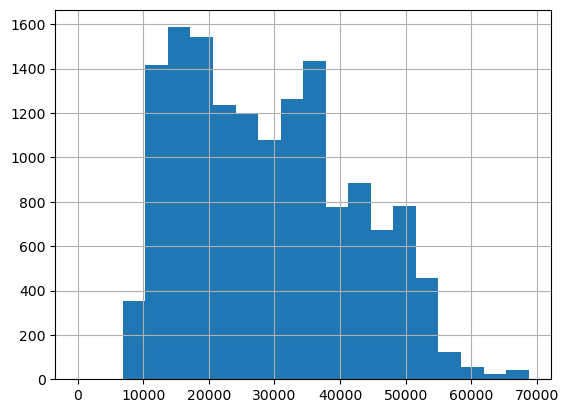

In [35]:
df['airports_nearest'].hist(bins=20)
df['airports_nearest'].describe()

**Вывод:** Аэропорт в СПб один - находится на юге города. На графике распределения наблюдается два пика:
1. Это южная часть города и близлежащие пригороды на юге, такие как Пушкин, где количество объявлений довольно-таки большое. Далее на расстоянии 20-30км от аэропорта число объявлений снижается, т.к. этот участок попадает на центр СПБ, где число объявлений меньше, чем в спальных районах.
2. От 30км число объявлений опять растет, т.к. этот участок попадает на серверные спальные районы города, где число объявлений больше.
3. Далее число объявлений опять снижается, потому что мы попадаем в пригород.

#### Расстояние до парка

count    5769.000000
mean      451.134512
std       218.999333
min         1.000000
25%       290.000000
50%       455.000000
75%       604.000000
max      1114.000000
Name: parks_nearest, dtype: float64

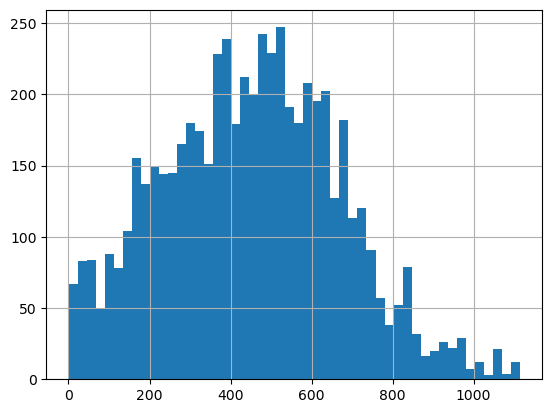

In [36]:
df['parks_nearest'].hist(bins=50)
df['parks_nearest'].describe()

**Вывод:** парки есть в пределах 1км почти у каждого дома.

#### Месяц размещения объявления

count    20123.000000
mean         6.414849
std          3.486273
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

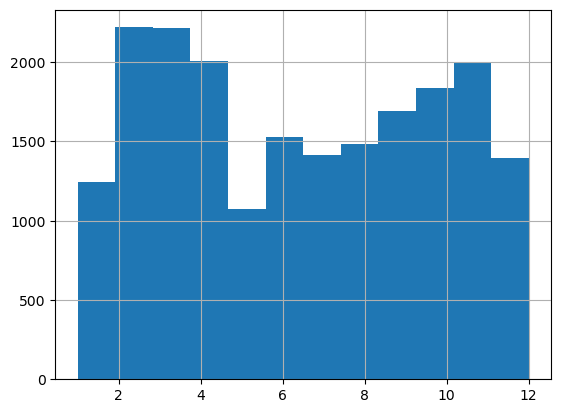

In [37]:
df['month'].hist(bins=12)
df['month'].describe()

**Вывод:** пик размещения объявлений приходится на февраль, март, апрель, летом снижается и восстанавливается осенью.

#### День недели размещения объявления

count    20123.000000
mean         2.588531
std          1.791722
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

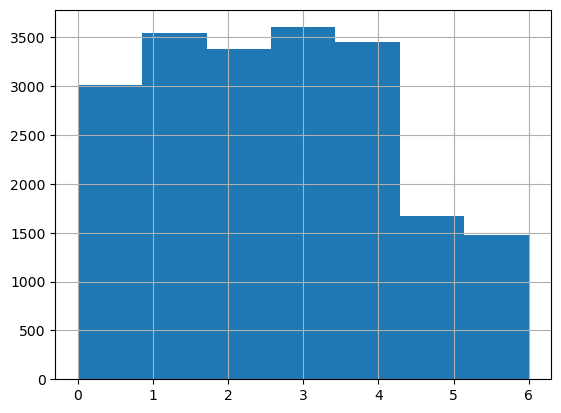

In [38]:
df['weekday'].hist(bins=7)
df['weekday'].describe()

**Вывод:** меньше всего объявлений размещается в пятницу и выходные дни.

#### Как быстро продавались квартиры

Изучим сколько дней продавались квартиры. Для этого построим гистограмму, расчитаем среднее и медианное значение:

Среднее кол-во дней продажи: 120.39374652413026
Медиана: 79.0
count    16183.000000
mean       120.393747
std        112.955569
min          1.000000
25%         39.000000
50%         79.000000
75%        171.000000
max        476.000000
Name: days_exposition, dtype: float64


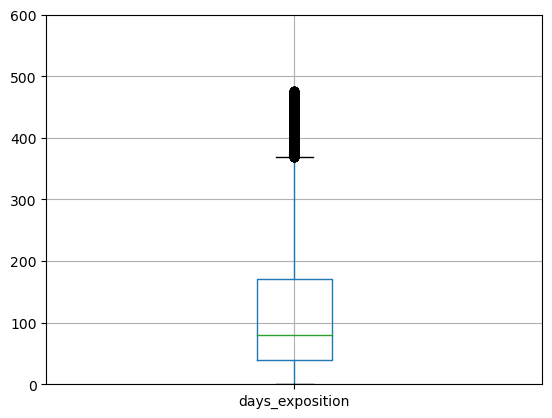

In [39]:
print('Среднее кол-во дней продажи:', df['days_exposition'].mean()) # посмотрим сколько в среднем продается одна квартира
print('Медиана:', df['days_exposition'].median()) # узнаем медиаонное значение дней продажи квартиры
print(df['days_exposition'].describe())
plt.ylim(0, 600)
df.boxplot(column='days_exposition');

369.0


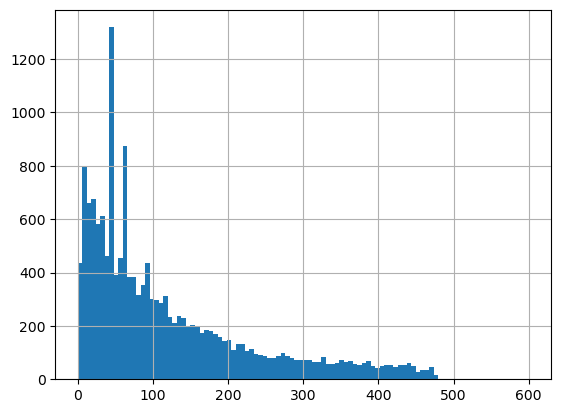

In [40]:
df['days_exposition'].hist(bins=100,range=[0,600])
q1 = df['days_exposition'].quantile(0.25)
q3 = df['days_exposition'].quantile(0.75)
iqr = q3 - q1
print(q3 + 1.5 * iqr)

**Выводы:**
1. Все продажи, которые занимают больше 386 дней можно считать выбросами.
2. В основном квартиы продаются за 41-179 дней. Медианное значение 83 дня.
3. Продажи быстрее 41 дня можно считать довольно быстрыми - их всего 25%.
4. Продажи дольше 179 дней - долгими. Таких тоже 25%.

#### Оценка влияния разных факторов на стоимость объекта

0.6403108472946717


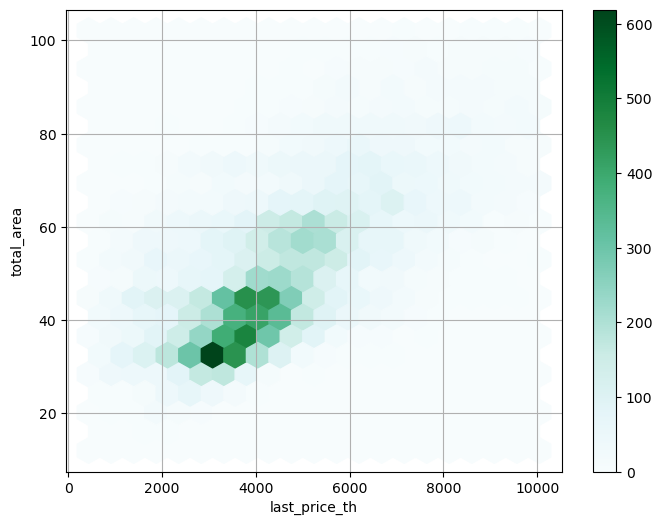

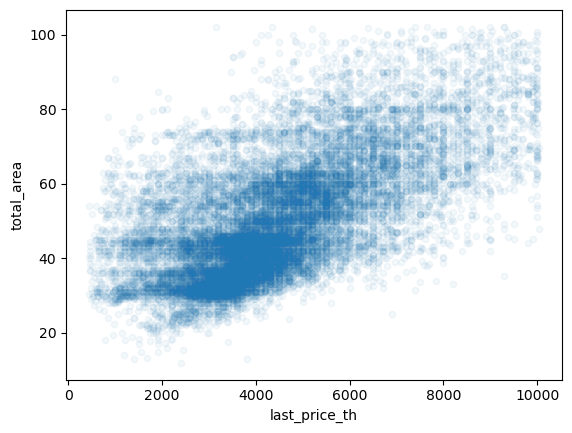

In [41]:
print(df['last_price_th'].corr(df['total_area']))
df.plot(x='last_price_th', y='total_area', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
df.plot(x='last_price_th', y='total_area', kind='scatter', alpha=0.05);

In [42]:
print('Корреляция с общей площадью:', df['last_price'].corr(df['living_area']))
print('Корреляция с площадью кухни:', df['last_price'].corr(df['kitchen_area']))
print('Корреляция с количеством комнат:', df['last_price'].corr(df['rooms']))
print('Корреляция с жилой площадью:', df['last_price'].corr(df['living_area']))
# print(df['last_price'].corr(df['floor_type']))
print('Корреляция с днем размещения объявления:', df['last_price'].corr(df['weekday']))
print('Корреляция с месяцем размещения объявления:', df['last_price'].corr(df['month']))
print('Корреляция с годом размещения объявления:', df['last_price'].corr(df['year']))

Корреляция с общей площадью: 0.5089768164631406
Корреляция с площадью кухни: 0.45171097436907637
Корреляция с количеством комнат: 0.40567141898244413
Корреляция с жилой площадью: 0.5089768164631406
Корреляция с днем размещения объявления: -0.009838397893509047
Корреляция с месяцем размещения объявления: 0.0065190488183184256
Корреляция с годом размещения объявления: 0.008196878767426828


**Выводы:**
1. Больше всего на общую стоимость объекта влияет его общая и жилая площадь.
2. Корреляция цены с площадью кухни и количеством комнат ниже, но все-таки есть.
3. Стоимость почти не зависит от дня, месяца и года и размещения объявления.

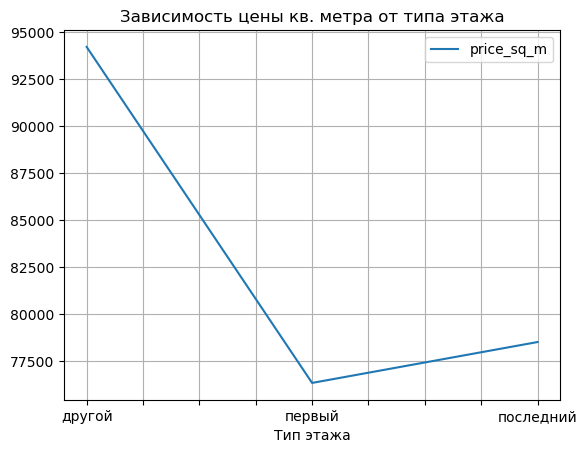

In [43]:
(
df
    .pivot_table(values='price_sq_m', index='floor_type', aggfunc='mean')
    .plot(grid=True, title='Зависимость цены кв. метра от типа этажа', xlabel='Тип этажа')
);

**Вывод:**
цена квадратного метра на первом этаже в среднем ниже, чем на последнем и других - это может объясняться тем, что первый этаж часто не самый комфортный для жизни, иногда на нем люди ставят решетки на окна, что не добавляет удовольствия.

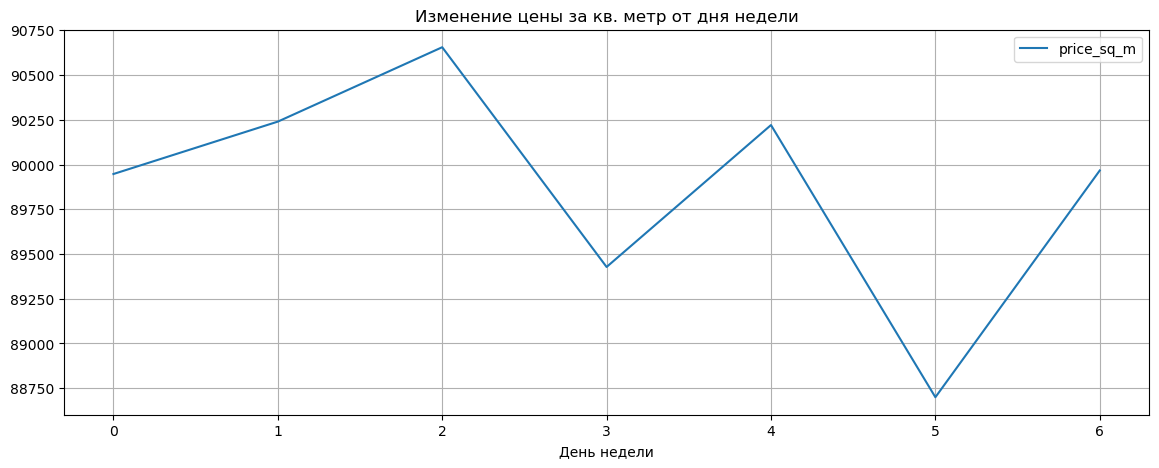

In [44]:
(
df
    .pivot_table(values='price_sq_m', index='weekday', aggfunc='mean')
    .plot(grid=True, title='Изменение цены за кв. метр от дня недели', xlabel='День недели', figsize=(14, 5))
);

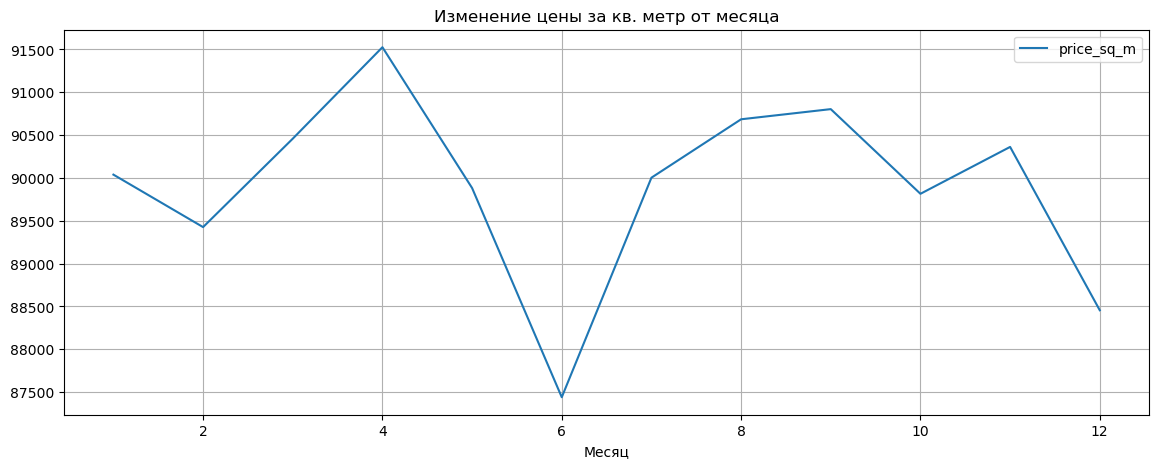

In [45]:
(
df
    .pivot_table(values='price_sq_m', index='month', aggfunc='mean')
    .plot(grid=True, title='Изменение цены за кв. метр от месяца', xlabel='Месяц', figsize=(14, 5))
);

**Выводы:**
1. Средняя цена за квадратный метр больше в высокий сезон.
2. Когда наступают летние месяца число объявлений снижается, спрос тоже падает, что приводит к снижению средней цены за метр.

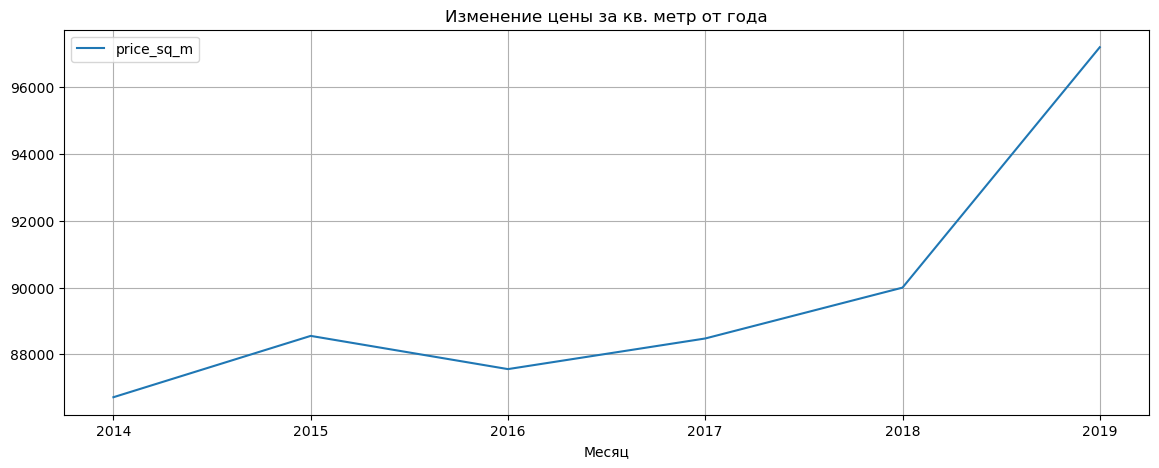

In [46]:
(
df
    .pivot_table(values='price_sq_m', index='year', aggfunc='mean')
    .plot(grid=True, title='Изменение цены за кв. метр от года', xlabel='Месяц', figsize=(14, 5))
);

**Выводы:** стоимость квадратного метра неуклонно растет с 2016 года, что похоже на правду.

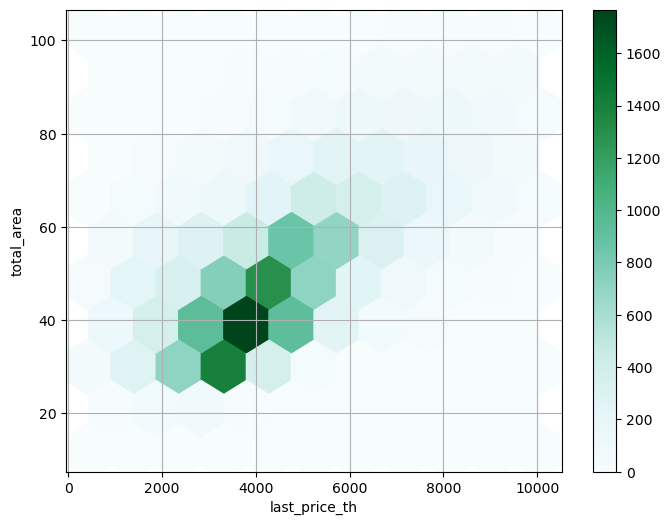

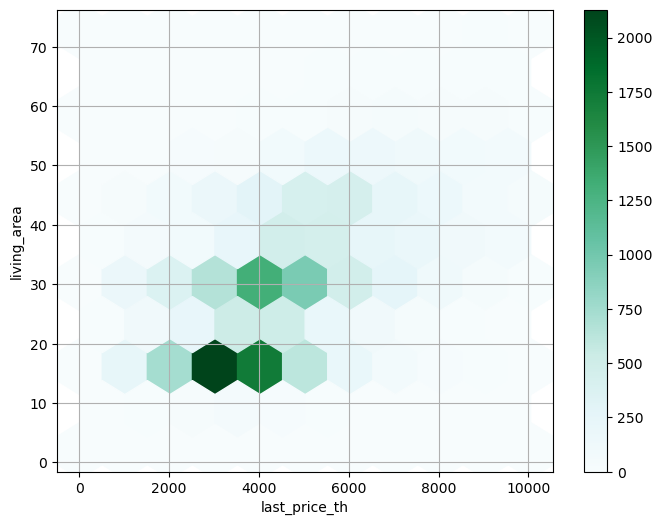

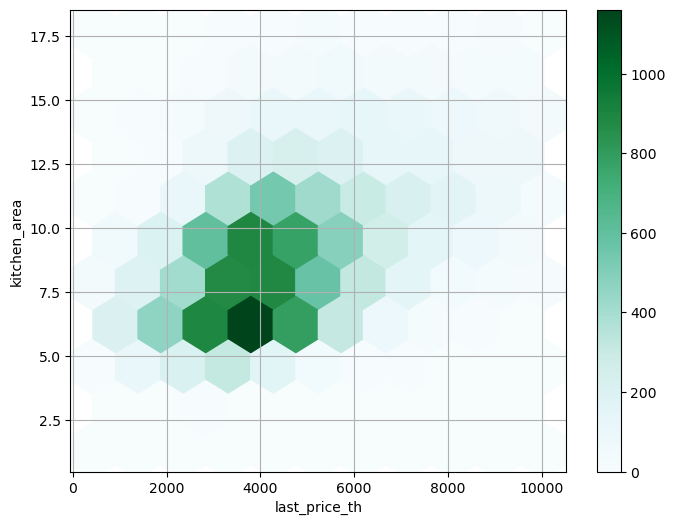

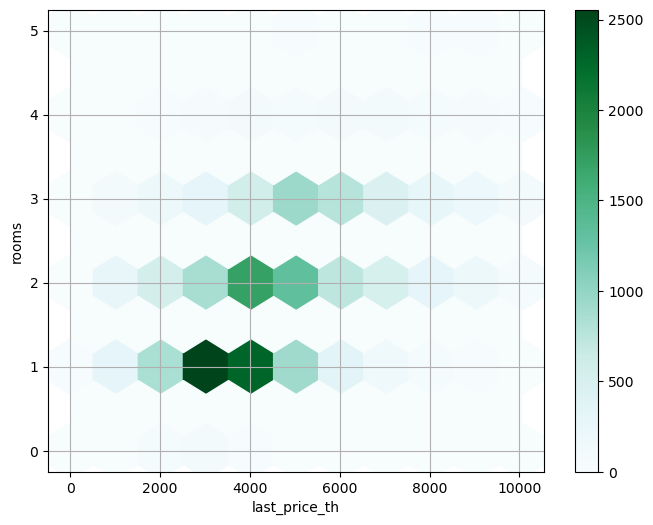

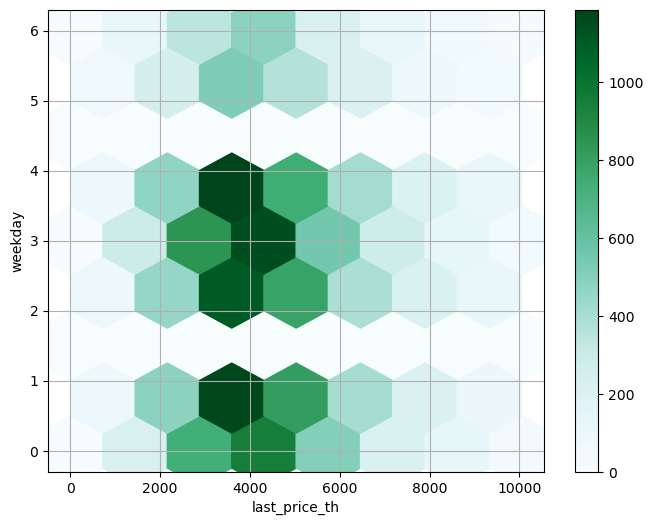

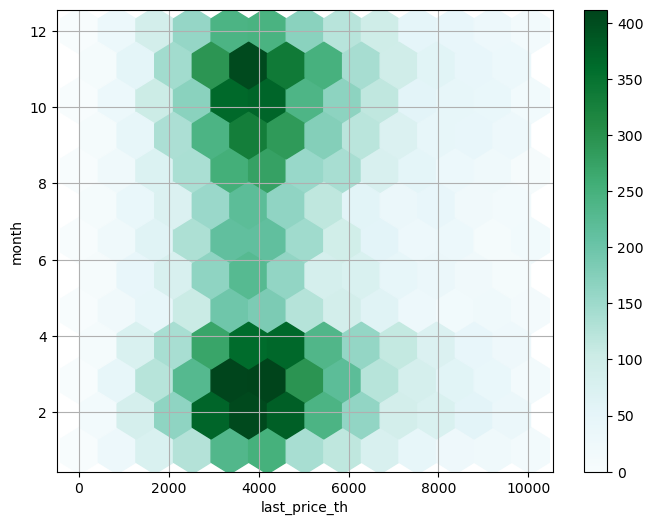

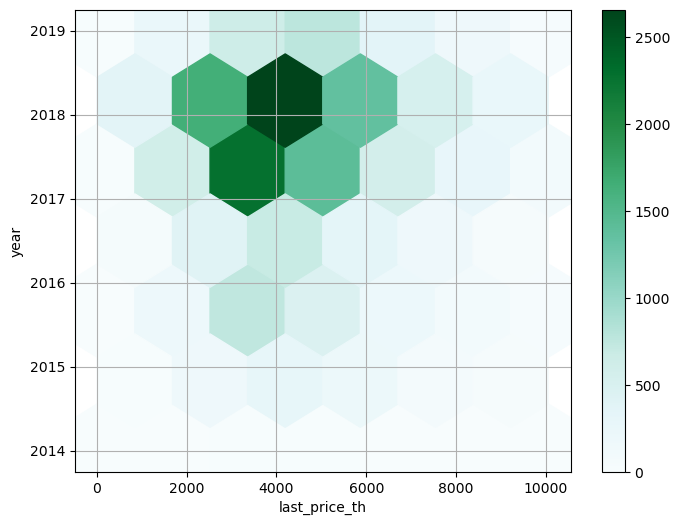

In [47]:
df.plot(x='last_price_th', y='total_area', kind='hexbin', gridsize=10, figsize=(8, 6), sharex=False, grid=True);
df.plot(x='last_price_th', y='living_area', kind='hexbin', gridsize=10, figsize=(8, 6), sharex=False, grid=True);
df.plot(x='last_price_th', y='kitchen_area', kind='hexbin', gridsize=10, figsize=(8, 6), sharex=False, grid=True);
df.plot(x='last_price_th', y='rooms', kind='hexbin', gridsize=10, figsize=(8, 6), sharex=False, grid=True);
# df.plot(x='last_price_th', y='floor_type', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
df.plot(x='last_price_th', y='weekday', kind='hexbin', gridsize=7, figsize=(8, 6), sharex=False, grid=True);
df.plot(x='last_price_th', y='month', kind='hexbin', gridsize=12, figsize=(8, 6), sharex=False, grid=True);
df.plot(x='last_price_th', y='year', kind='hexbin', gridsize=6, figsize=(8, 6), sharex=False, grid=True);


**Выводы:**
1. Основную часть объявлений составляют квартиры площадь которых около 40 квадратных метров, их стоимость около 4 млн рублей.
2. Больше всего объявлений с жилой площадью от 10 до 20 квадратных метров, их стоимость окло 3 млн рублей.
3. В основном представлены квартиры с площадью кухни от 5 до 7,5 кв м - их цена около 4 млн рублей.
4. Больше всего объявлений по продаже 1 конмнатных квартир со стоимостью около 3 млн рублей.

In [48]:
# посмотрим разбивку числа объявлений по населенным пунктам
df['locality_name'].value_counts().head(10)

санкт-петербург      12770
поселок мурино         533
поселок шушары         426
всеволожск             367
поселок парголово      326
пушкин                 315
колпино                306
деревня кудрово        292
гатчина                278
выборг                 209
Name: locality_name, dtype: int64

In [73]:
df_top = df.pivot_table(index='locality_name', values=['price_sq_m'], aggfunc=['mean', 'count']).reset_index()
df_top.columns = df_top.columns.droplevel(1)
df_top = df_top.rename(columns={'mean':'price_sq_m', 'count':'adv_number'})
print(df_top.sort_values(by='adv_number', ascending=False).head(10))

         locality_name     price_sq_m  adv_number
303    санкт-петербург  103913.070491       11328
213     поселок мурино   85735.834508         533
293     поселок шушары   78771.140415         420
3           всеволожск   66897.116099         364
223  поселок парголово   90447.638633         324
127            колпино   75401.322213         305
297             пушкин   99653.989403         291
52     деревня кудрово   92709.147572         290
6              гатчина   68246.702728         273
4               выборг   57835.880047         201


**Выводы:** самая высокая стоимость квадратного метра в Санкт-Петербурге, в Пушкине цена не сильно отличается, в других пригородах цена значительно ниже.

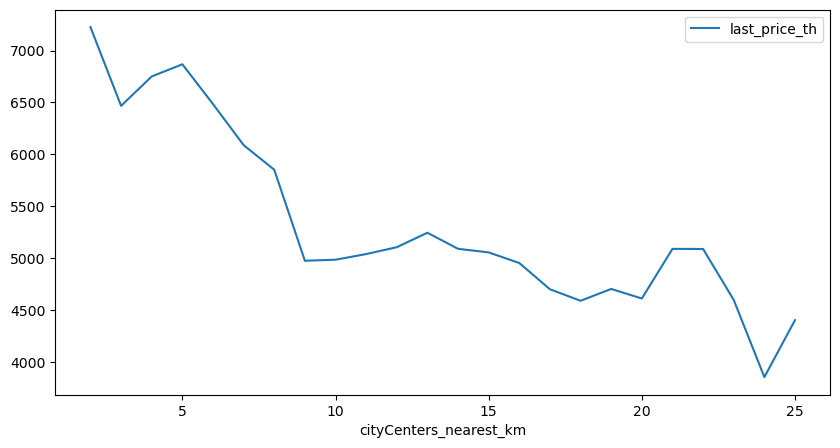

In [74]:
spb = df.query('locality_name == "санкт-петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price_th').plot(figsize=(10,5))

**Выводы:**
1. Общий тренд показывает, что стоимость квадратного метра квартир в СПб снижается с отдалением от центра.
2. Однако в 20км от центра наблюдается всплеск. Он может быть связан с такими факторами как близость аэропорта, качество ремонта или, например, это может быть курортный район СПб, где цена недвижимости значительно выше, чем в стандартных спальных районах.

[Оглавление](#section_id6)

### 5. Результаты исследования
<a id='section_id5'></a>

- основным фактором, определяющим общую стоимость недвижимости в СПб является площадь квартиры и жилая площадь - коэффициент корреляции составляет 0,54;
- стоимость квадратного метра в СПб и Пушкине значительно выше, чем в других населенных пунтках Лен. области;
- стоимость квадратного метра в СПб снижается по мере отдаления от центра за исключением районов, расположенных на расстоянии 20км, где высокую стоимость недвижимости могут определять различные факторы. Для уточнения требуется проведения дополнительного исследования с использованием таких данных как район, качество ремонта, 

Был проведен анализ данных сервиса Яндекс Недвижимость по продажам квартир в СПб и соседних населенных пунктах.
Анализ включал в себя следующие этапы:<br>
**1. Обзор данных.** <br>
Изначально получено 23 699 строк и 22 колонки данных. Построенны гисторграммы и общая информация о данных для планирования дальнейших шагов исследования.<br>
**2. Предобработка данных.**<br>
В данных были обнаружены пропуски и заполнены:<br>
- balcony, parks_around3000, ponds_around3000 - заполнены значением 0;
- ceiling_height - заполненно медианным значением;
- floors_total, locality_name - доля пропусков в этих колонках менее 5%, не представляется возможным их восстановить, поэтому строки с пропусками в этих колонках были удалены.<br>
Был изменен тип данных в следующих столбцах:<br>
- first_day_exposition - на datetime, т.к. в этом формате будет удобно фильтровать объявление по нужным нам временным интервалам или делать сводную таблицу, например, по месяцам, кварталам;
- is_apartment - на bool, т.к. это булевый тип данных и в нем возможны только два варианта ответа (да или нет);
- balcony, floors_total - на int.<br>

Сделана проверка на явные дубликаты - их не обнаружено.<br>
Осуществлен поиск не явных дубликатов в колонке locality_name.<br>
**3. Подготовка данных для исследования.**<br>
Добавлены новые столбцы: цена за квадратный метр, день недели размещения объявления, месяц и год, расстоение до центра переведено в км.<br>
**4. Исследовательский анализ.**<br>
Выводы по целям исследования:
- Все продажи, которые занимают больше 386 дней можно считать выбросами. В основном квартиы продаются за 41-179 дней. Медианное значение 83 дня. Продажи быстрее 41 дня можно считать довольно быстрыми - их всего 25%. Продажи дольше 179 дней - долгими. Таких тоже 25%.
- Основным фактором, определяющим общую стоимость недвижимости в СПб является площадь квартиры и жилая площадь - коэффициент корреляции составляет 0,54;
- Стоимость квадратного метра в СПб и Пушкине значительно выше, чем в других населенных пунтках Лен. области. Она составляет 104 тыс. руб. для СПб и 100 тыс. руб. для Пушкина. Следом идет Кудрово, которое по сути является уже частью СПб с ценой 92,7 тыс. руб.
- Стоимость квадратного метра в СПб снижается по мере отдаления от центра за исключением районов, расположенных на расстоянии 20км, где высокую стоимость недвижимости могут определять различные факторы. Для уточнения требуется проведения дополнительного исследования с использованием таких данных как район, качество ремонта, 

[Оглавление](#section_id6)